In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import sklearn as skl
import tensorflow as tf

In [2]:
# Need to be able to pull user input from database to test with ML model

In [3]:
file_path = '../Cleaned Data/CleanData.csv'

In [4]:
df = pd.read_csv(file_path)
df = df.drop(columns=['Unnamed: 0'],axis=1)
df

Location  PercentBet_ML  Average_Line_ML  PercentBet_Spread  \
0        away           46.0            183.2               45.1   
1        home           54.0           -210.4               54.9   
2        away           55.7            713.6               42.4   
3        home           44.3          -1015.4               57.6   
4        away           58.9           -162.0               58.6   
...       ...            ...              ...                ...   
2447     home           45.2           -888.8               59.6   
2448     away           61.6            262.8               39.7   
2449     home           38.4           -311.2               60.3   
2450     away           58.1            131.0               58.3   
2451     home           41.9           -147.8               41.7   

      Average_Line_Spread  Average_Odds_Spread  PercentBet_OU  \
0                    4.70              -105.80           56.9   
1                   -4.70              -108.20           43.1   
2                   12.50              -106.00           52.2   
3                  -12.50              -109.83           47.8   
4                   -3.50              -109.40           56.7   
...                   ...                  ...            ...   
2447               -12.67              -107.67           43.8   
2448                 7.33              -108.67           46.5   
2449                -7.33              -110.17           53.5   
2450                 3.67              -107.50           55.7   
2451                -3.67              -107.50           44.3   

      Average_Line_OU  Average_Odds_OU  Pts  Spread Result  Total  Spread WL  \
0              210.92          -106.17   87     -18      L    192          0   
1              210.92          -108.83  105      18      W    192          1   
2              220.83          -108.33  100      -8      L    208          1   
3              220.83          -106.67  108       8      W    208          0   
4              221.08          -108.67  113       1      W    225          0   
...               ...              ...  ...     ...    ...    ...        ...   
2447           218.42          -107.17   99       4      W    194          0   
2448           225.50          -107.40  137      -6      L    280          1   
2449           225.50          -106.60  143       6      W    280          0   
2450           227.00          -107.67  131      -5      L    267          0   
2451           227.00          -107.33  136       5      W    267          1   

      Over/Under WL  MoneyLine WL  
0                 0             0  
1                 0             1  
2                 0             0  
3                 0             1  
4                 1             1  
...             ...           ...  
2447              0             1  
2448              1             0  
2449              1             1  
2450              1             0  
2451              1             1  

[2452 rows x 16 columns]

In [5]:
def correlation_graphs(df,target):
    
    i = 1
    count = 1
    
    named_columns = list(df.columns)
    columns_dict = {}
    col_num=1
    for name in named_columns:
        columns_dict[name] = col_num
        col_num +=1
    
    
    for i in list(range(1,10)):
        num_cols = 10-(i)

        if i == 9:
            break

        for j in list(range(1,num_cols)):
            j = i+j
            var1 = df.iloc[:,i]
            var2 = df.iloc[:,j]

            key1 = [k for k,v in columns_dict.items() if v == i]
            key2 = [k for k,v in columns_dict.items() if v == j]


            plt.scatter(var1,var2,label=df[target],c=df[target])
            plt.legend
            plt.show()
            print(count)
            print(f'{key1} vs {key2}')
            count +=1

# Moneyline

In [6]:
# Cleaning the Data to the Point it could be fed to ML Algorithm
# TeamId and GameId are taken out for the initial exploration of the data. If it is 
# determined we need more features / better correlation, we will merge more data 
# using these ID's

df_ML = df.copy()
df_ML = df_ML.drop(columns=['Spread WL','Over/Under WL'])
df_ML

Location  PercentBet_ML  Average_Line_ML  PercentBet_Spread  \
0        away           46.0            183.2               45.1   
1        home           54.0           -210.4               54.9   
2        away           55.7            713.6               42.4   
3        home           44.3          -1015.4               57.6   
4        away           58.9           -162.0               58.6   
...       ...            ...              ...                ...   
2447     home           45.2           -888.8               59.6   
2448     away           61.6            262.8               39.7   
2449     home           38.4           -311.2               60.3   
2450     away           58.1            131.0               58.3   
2451     home           41.9           -147.8               41.7   

      Average_Line_Spread  Average_Odds_Spread  PercentBet_OU  \
0                    4.70              -105.80           56.9   
1                   -4.70              -108.20           43.1   
2                   12.50              -106.00           52.2   
3                  -12.50              -109.83           47.8   
4                   -3.50              -109.40           56.7   
...                   ...                  ...            ...   
2447               -12.67              -107.67           43.8   
2448                 7.33              -108.67           46.5   
2449                -7.33              -110.17           53.5   
2450                 3.67              -107.50           55.7   
2451                -3.67              -107.50           44.3   

      Average_Line_OU  Average_Odds_OU  Pts  Spread Result  Total  \
0              210.92          -106.17   87     -18      L    192   
1              210.92          -108.83  105      18      W    192   
2              220.83          -108.33  100      -8      L    208   
3              220.83          -106.67  108       8      W    208   
4              221.08          -108.67  113       1      W    225   
...               ...              ...  ...     ...    ...    ...   
2447           218.42          -107.17   99       4      W    194   
2448           225.50          -107.40  137      -6      L    280   
2449           225.50          -106.60  143       6      W    280   
2450           227.00          -107.67  131      -5      L    267   
2451           227.00          -107.33  136       5      W    267   

      MoneyLine WL  
0                0  
1                1  
2                0  
3                1  
4                1  
...            ...  
2447             1  
2448             0  
2449             1  
2450             0  
2451             1  

[2452 rows x 14 columns]

In [7]:
# Now we need to focus on finding which features have correlation in order to include them 
# in the machine learning model.

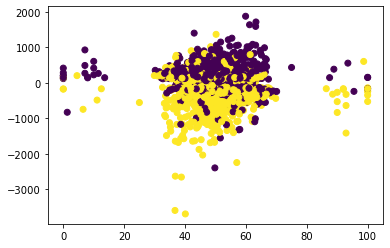

1
['Location'] vs ['PercentBet_ML']


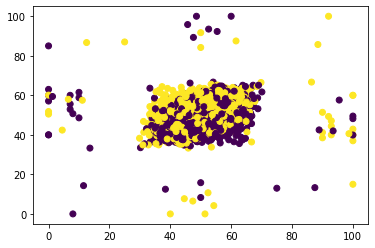

2
['Location'] vs ['Average_Line_ML']


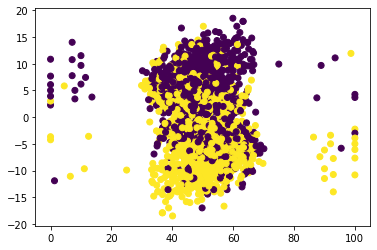

3
['Location'] vs ['PercentBet_Spread']


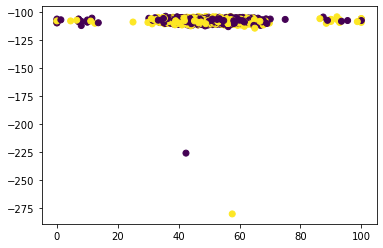

4
['Location'] vs ['Average_Line_Spread']


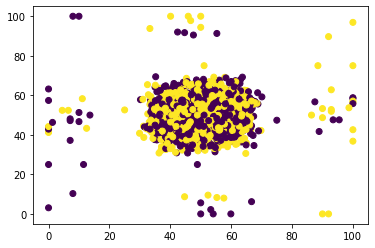

5
['Location'] vs ['Average_Odds_Spread']


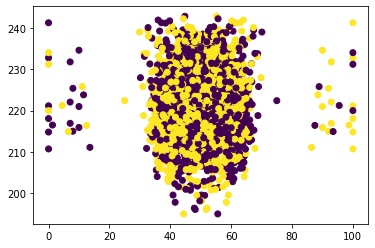

6
['Location'] vs ['PercentBet_OU']


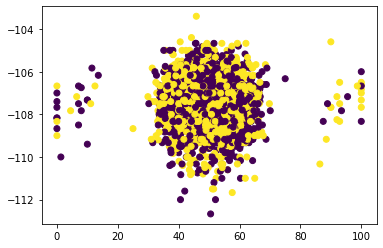

7
['Location'] vs ['Average_Line_OU']


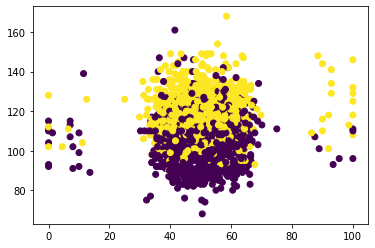

8
['Location'] vs ['Average_Odds_OU']


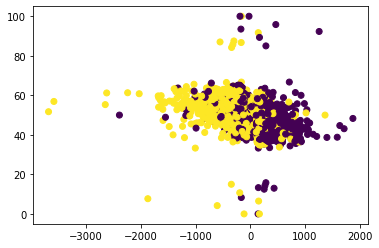

9
['PercentBet_ML'] vs ['Average_Line_ML']


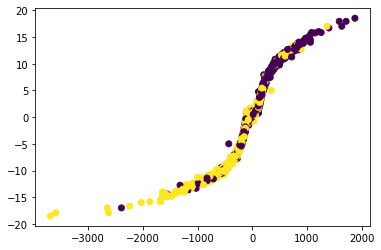

10
['PercentBet_ML'] vs ['PercentBet_Spread']


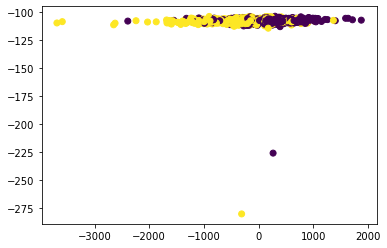

11
['PercentBet_ML'] vs ['Average_Line_Spread']


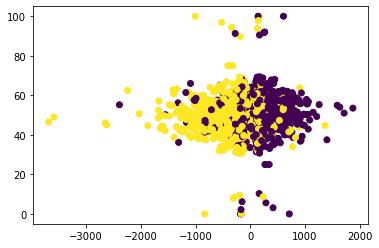

12
['PercentBet_ML'] vs ['Average_Odds_Spread']


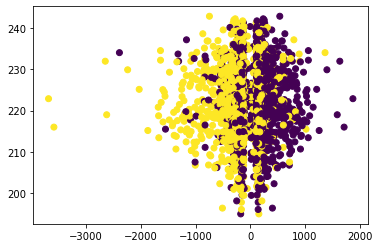

13
['PercentBet_ML'] vs ['PercentBet_OU']


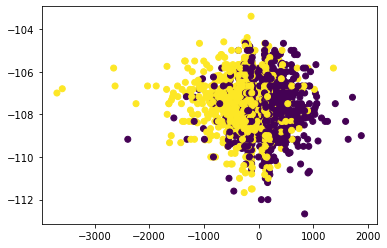

14
['PercentBet_ML'] vs ['Average_Line_OU']


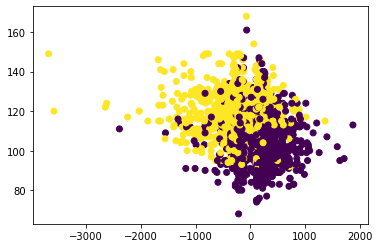

15
['PercentBet_ML'] vs ['Average_Odds_OU']


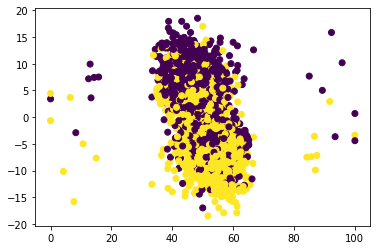

16
['Average_Line_ML'] vs ['PercentBet_Spread']


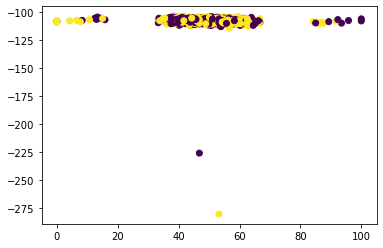

17
['Average_Line_ML'] vs ['Average_Line_Spread']


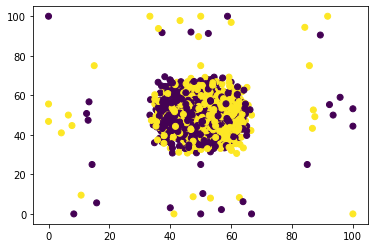

18
['Average_Line_ML'] vs ['Average_Odds_Spread']


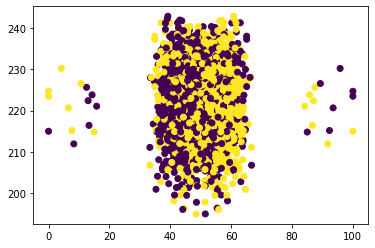

19
['Average_Line_ML'] vs ['PercentBet_OU']


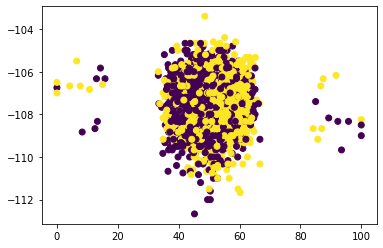

20
['Average_Line_ML'] vs ['Average_Line_OU']


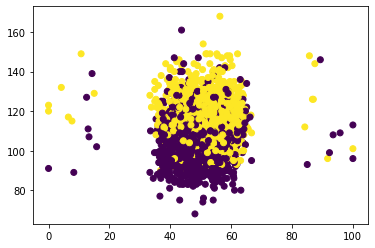

21
['Average_Line_ML'] vs ['Average_Odds_OU']


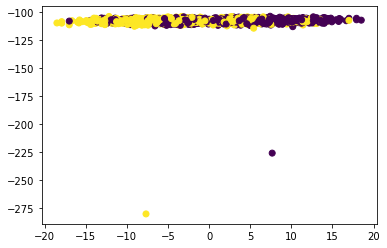

22
['PercentBet_Spread'] vs ['Average_Line_Spread']


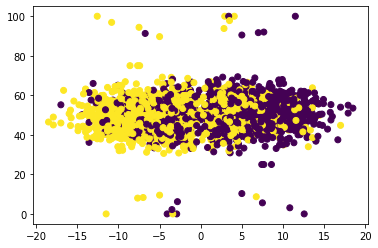

23
['PercentBet_Spread'] vs ['Average_Odds_Spread']


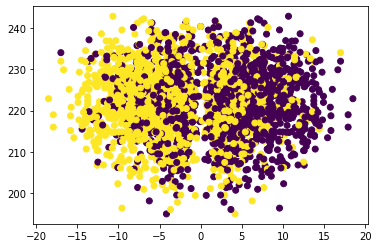

24
['PercentBet_Spread'] vs ['PercentBet_OU']


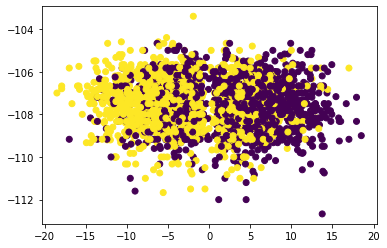

25
['PercentBet_Spread'] vs ['Average_Line_OU']


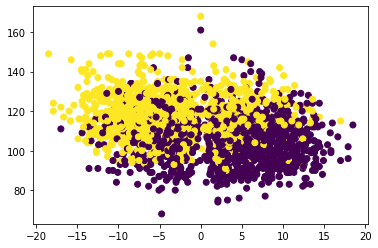

26
['PercentBet_Spread'] vs ['Average_Odds_OU']


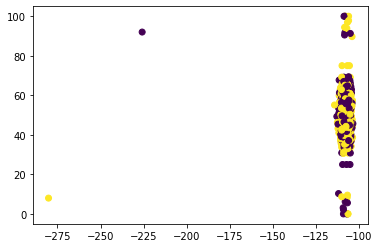

27
['Average_Line_Spread'] vs ['Average_Odds_Spread']


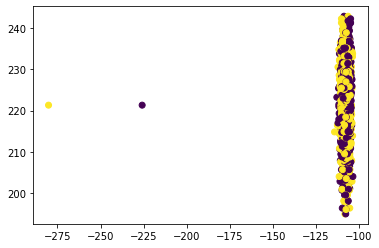

28
['Average_Line_Spread'] vs ['PercentBet_OU']


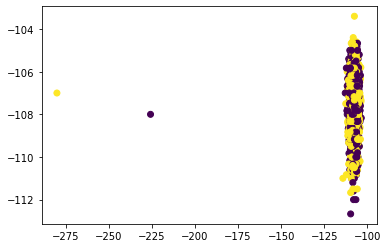

29
['Average_Line_Spread'] vs ['Average_Line_OU']


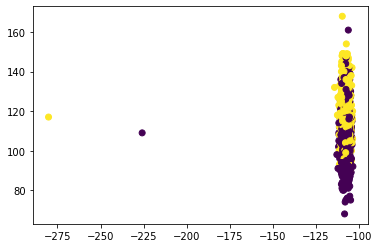

30
['Average_Line_Spread'] vs ['Average_Odds_OU']


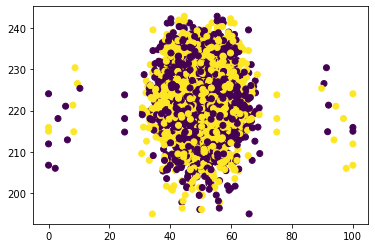

31
['Average_Odds_Spread'] vs ['PercentBet_OU']


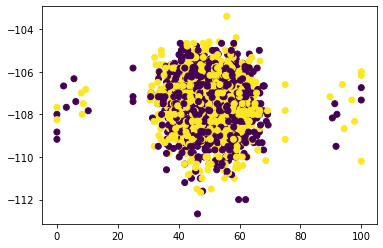

32
['Average_Odds_Spread'] vs ['Average_Line_OU']


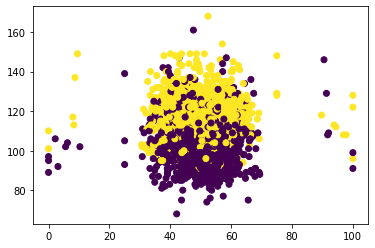

33
['Average_Odds_Spread'] vs ['Average_Odds_OU']


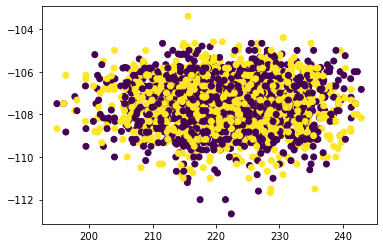

34
['PercentBet_OU'] vs ['Average_Line_OU']


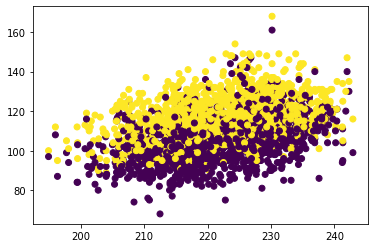

35
['PercentBet_OU'] vs ['Average_Odds_OU']


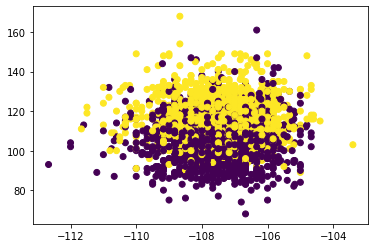

36
['Average_Line_OU'] vs ['Average_Odds_OU']


In [8]:
correlation_graphs(df_ML,'MoneyLine WL')

In [11]:
# Determining which Variables have correlation 
df_ML = df_ML[['Location','PercentBet_ML','Average_Odds_OU','Average_Line_ML','PercentBet_Spread','Average_Line_Spread','Average_Odds_Spread','PercentBet_OU','Average_Line_OU','MoneyLine WL']]
df_ML


Location  PercentBet_ML  Average_Odds_OU  Average_Line_ML  \
0        away           46.0          -106.17            183.2   
1        home           54.0          -108.83           -210.4   
2        away           55.7          -108.33            713.6   
3        home           44.3          -106.67          -1015.4   
4        away           58.9          -108.67           -162.0   
...       ...            ...              ...              ...   
2447     home           45.2          -107.17           -888.8   
2448     away           61.6          -107.40            262.8   
2449     home           38.4          -106.60           -311.2   
2450     away           58.1          -107.67            131.0   
2451     home           41.9          -107.33           -147.8   

      PercentBet_Spread  Average_Line_Spread  Average_Odds_Spread  \
0                  45.1                 4.70              -105.80   
1                  54.9                -4.70              -108.20   
2                  42.4                12.50              -106.00   
3                  57.6               -12.50              -109.83   
4                  58.6                -3.50              -109.40   
...                 ...                  ...                  ...   
2447               59.6               -12.67              -107.67   
2448               39.7                 7.33              -108.67   
2449               60.3                -7.33              -110.17   
2450               58.3                 3.67              -107.50   
2451               41.7                -3.67              -107.50   

      PercentBet_OU  Average_Line_OU  MoneyLine WL  
0              56.9           210.92             0  
1              43.1           210.92             1  
2              52.2           220.83             0  
3              47.8           220.83             1  
4              56.7           221.08             1  
...             ...              ...           ...  
2447           43.8           218.42             1  
2448           46.5           225.50             0  
2449           53.5           225.50             1  
2450           55.7           227.00             0  
2451           44.3           227.00             1  

[2452 rows x 10 columns]

In [13]:
# Converting categorical variables to numeric for ML algorithm
location_ML = pd.get_dummies(df_ML.Location)
final_ML_df = location_ML.join(df_ML).drop(columns='Location',axis=1)
final_ML_df

away  home  PercentBet_ML  Average_Odds_OU  Average_Line_ML  \
0        1     0           46.0          -106.17            183.2   
1        0     1           54.0          -108.83           -210.4   
2        1     0           55.7          -108.33            713.6   
3        0     1           44.3          -106.67          -1015.4   
4        1     0           58.9          -108.67           -162.0   
...    ...   ...            ...              ...              ...   
2447     0     1           45.2          -107.17           -888.8   
2448     1     0           61.6          -107.40            262.8   
2449     0     1           38.4          -106.60           -311.2   
2450     1     0           58.1          -107.67            131.0   
2451     0     1           41.9          -107.33           -147.8   

      PercentBet_Spread  Average_Line_Spread  Average_Odds_Spread  \
0                  45.1                 4.70              -105.80   
1                  54.9                -4.70              -108.20   
2                  42.4                12.50              -106.00   
3                  57.6               -12.50              -109.83   
4                  58.6                -3.50              -109.40   
...                 ...                  ...                  ...   
2447               59.6               -12.67              -107.67   
2448               39.7                 7.33              -108.67   
2449               60.3                -7.33              -110.17   
2450               58.3                 3.67              -107.50   
2451               41.7                -3.67              -107.50   

      PercentBet_OU  Average_Line_OU  MoneyLine WL  
0              56.9           210.92             0  
1              43.1           210.92             1  
2              52.2           220.83             0  
3              47.8           220.83             1  
4              56.7           221.08             1  
...             ...              ...           ...  
2447           43.8           218.42             1  
2448           46.5           225.50             0  
2449           53.5           225.50             1  
2450           55.7           227.00             0  
2451           44.3           227.00             1  

[2452 rows x 11 columns]

In [14]:
# Splitting the target variable and the features
y_ML = final_ML_df['MoneyLine WL']
X_ML = final_ML_df.drop(columns='MoneyLine WL',axis=1).values

In [15]:
# Splitting Data into Training and Testing Sets
X_train_ML,X_test_ML,y_train_ML,y_test_ML = train_test_split(X_ML,y_ML,random_state=42)

In [16]:
# Scaling the data

# Create the instance of the scaler
scaler_ML = skl.preprocessing.StandardScaler()

# Fit the scaler 
scaler_ML.fit(X_train_ML)

# Now scale the data
X_train_scaled_ML = scaler_ML.transform(X_train_ML)
X_test_scaled_ML = scaler_ML.transform(X_test_ML)

In [17]:
# Create the Neural Network Model (we will use Keras module and use a Sequential Model)
nn_model_ML = tf.keras.models.Sequential()

# Layers of the Keras Sequential Model are added using the Dense Class

# Adding First Hidden Layer and Input Dimension(10)
nn_model_ML.add(tf.keras.layers.Dense(units=20,activation='relu',input_dim=10))

# Adding Second Hidden Layer
nn_model_ML.add(tf.keras.layers.Dense(units=20,activation='relu'))

# Adding Output Layer
nn_model_ML.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

# Check Layout of Neural Network
nn_model_ML.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 16)                176       
                                                                 
 dense_4 (Dense)             (None, 16)                272       
                                                                 
 dense_5 (Dense)             (None, 1)                 17        
                                                                 
Total params: 465
Trainable params: 465
Non-trainable params: 0
_________________________________________________________________


In [18]:
# Compile the Network
nn_model_ML.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Run the Network
fit_model_ML = nn_model_ML.fit(X_train_scaled_ML,y_train_ML,epochs=100)

Epoch 1/100
58/58 [==============================] - 0s 1ms/step - loss: 0.6885 - accuracy: 0.5628
Epoch 2/100
58/58 [==============================] - 0s 1ms/step - loss: 0.6472 - accuracy: 0.6281
Epoch 3/100
58/58 [==============================] - 0s 1ms/step - loss: 0.6282 - accuracy: 0.6531
Epoch 4/100
58/58 [==============================] - 0s 1ms/step - loss: 0.6193 - accuracy: 0.6563
Epoch 5/100
58/58 [==============================] - 0s 1ms/step - loss: 0.6127 - accuracy: 0.6639
Epoch 6/100
58/58 [==============================] - 0s 1ms/step - loss: 0.6099 - accuracy: 0.6661
Epoch 7/100
58/58 [==============================] - 0s 1ms/step - loss: 0.6066 - accuracy: 0.6656
Epoch 8/100
58/58 [==============================] - 0s 1ms/step - loss: 0.6048 - accuracy: 0.6656
Epoch 9/100
58/58 [==============================] - 0s 1ms/step - loss: 0.6032 - accuracy: 0.6667
Epoch 10/100
58/58 [==============================] - 0s 1ms/step - loss: 0.6019 - accuracy: 0.6678
Epoch 11/

58/58 [==============================] - 0s 1ms/step - loss: 0.5542 - accuracy: 0.7107
Epoch 84/100
58/58 [==============================] - 0s 1ms/step - loss: 0.5528 - accuracy: 0.7123
Epoch 85/100
58/58 [==============================] - 0s 1ms/step - loss: 0.5533 - accuracy: 0.7145
Epoch 86/100
58/58 [==============================] - 0s 1ms/step - loss: 0.5516 - accuracy: 0.7102
Epoch 87/100
58/58 [==============================] - 0s 1ms/step - loss: 0.5520 - accuracy: 0.7107
Epoch 88/100
58/58 [==============================] - 0s 1ms/step - loss: 0.5506 - accuracy: 0.7156
Epoch 89/100
58/58 [==============================] - 0s 1ms/step - loss: 0.5510 - accuracy: 0.7123
Epoch 90/100
58/58 [==============================] - 0s 1ms/step - loss: 0.5505 - accuracy: 0.7113
Epoch 91/100
58/58 [==============================] - 0s 1ms/step - loss: 0.5491 - accuracy: 0.7091
Epoch 92/100
58/58 [==============================] - 0s 1ms/step - loss: 0.5487 - accuracy: 0.7183
Epoch 93/100


# Spread

In [19]:
df_spread = df.copy()
df_spread = df_spread.drop(columns=['Over/Under WL','MoneyLine WL'])
df_spread

Location  PercentBet_ML  Average_Line_ML  PercentBet_Spread  \
0        away           46.0            183.2               45.1   
1        home           54.0           -210.4               54.9   
2        away           55.7            713.6               42.4   
3        home           44.3          -1015.4               57.6   
4        away           58.9           -162.0               58.6   
...       ...            ...              ...                ...   
2447     home           45.2           -888.8               59.6   
2448     away           61.6            262.8               39.7   
2449     home           38.4           -311.2               60.3   
2450     away           58.1            131.0               58.3   
2451     home           41.9           -147.8               41.7   

      Average_Line_Spread  Average_Odds_Spread  PercentBet_OU  \
0                    4.70              -105.80           56.9   
1                   -4.70              -108.20           43.1   
2                   12.50              -106.00           52.2   
3                  -12.50              -109.83           47.8   
4                   -3.50              -109.40           56.7   
...                   ...                  ...            ...   
2447               -12.67              -107.67           43.8   
2448                 7.33              -108.67           46.5   
2449                -7.33              -110.17           53.5   
2450                 3.67              -107.50           55.7   
2451                -3.67              -107.50           44.3   

      Average_Line_OU  Average_Odds_OU  Pts  Spread Result  Total  Spread WL  
0              210.92          -106.17   87     -18      L    192          0  
1              210.92          -108.83  105      18      W    192          1  
2              220.83          -108.33  100      -8      L    208          1  
3              220.83          -106.67  108       8      W    208          0  
4              221.08          -108.67  113       1      W    225          0  
...               ...              ...  ...     ...    ...    ...        ...  
2447           218.42          -107.17   99       4      W    194          0  
2448           225.50          -107.40  137      -6      L    280          1  
2449           225.50          -106.60  143       6      W    280          0  
2450           227.00          -107.67  131      -5      L    267          0  
2451           227.00          -107.33  136       5      W    267          1  

[2452 rows x 14 columns]

In [20]:
# Now we need to focus on finding which features have correlation in order to include them 
# in the machine learning model.

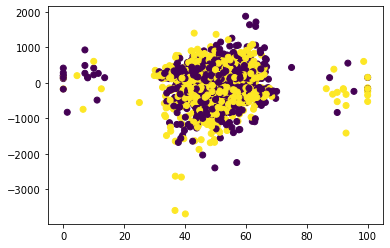

1
['Location'] vs ['PercentBet_ML']


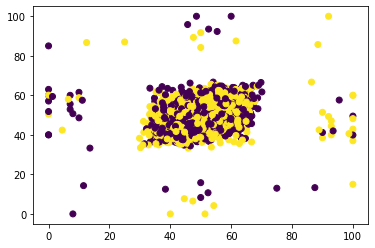

2
['Location'] vs ['Average_Line_ML']


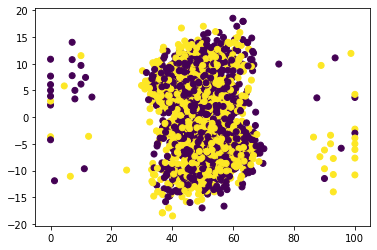

3
['Location'] vs ['PercentBet_Spread']


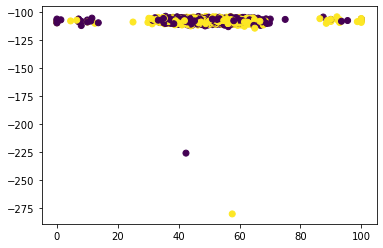

4
['Location'] vs ['Average_Line_Spread']


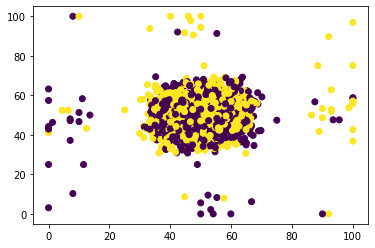

5
['Location'] vs ['Average_Odds_Spread']


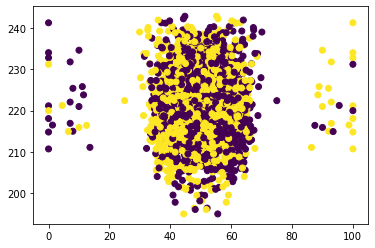

6
['Location'] vs ['PercentBet_OU']


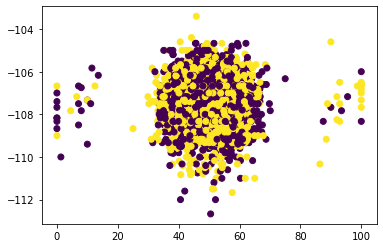

7
['Location'] vs ['Average_Line_OU']


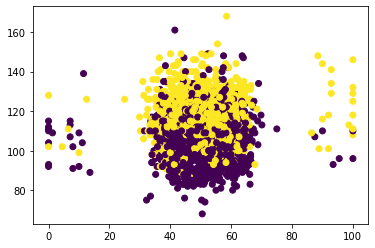

8
['Location'] vs ['Average_Odds_OU']


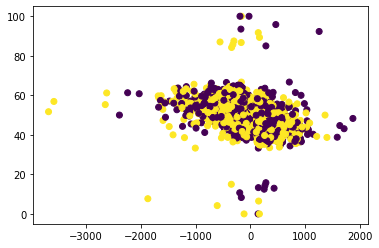

9
['PercentBet_ML'] vs ['Average_Line_ML']


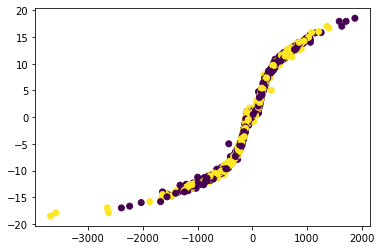

10
['PercentBet_ML'] vs ['PercentBet_Spread']


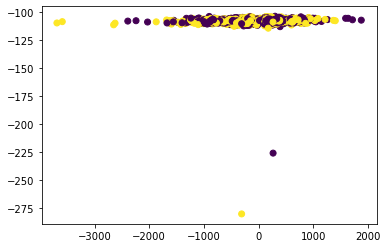

11
['PercentBet_ML'] vs ['Average_Line_Spread']


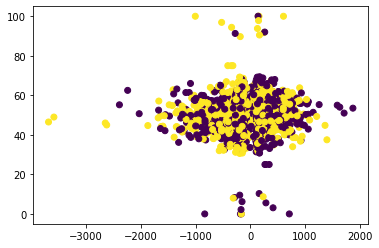

12
['PercentBet_ML'] vs ['Average_Odds_Spread']


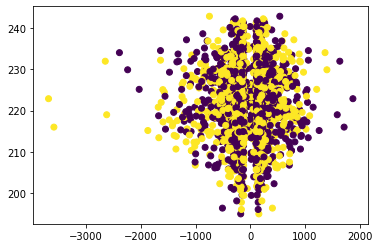

13
['PercentBet_ML'] vs ['PercentBet_OU']


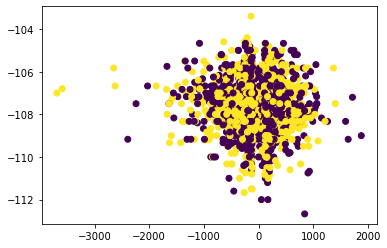

14
['PercentBet_ML'] vs ['Average_Line_OU']


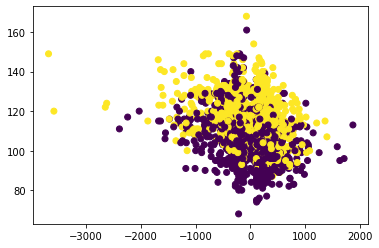

15
['PercentBet_ML'] vs ['Average_Odds_OU']


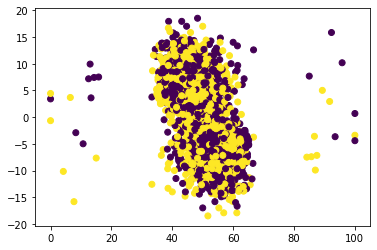

16
['Average_Line_ML'] vs ['PercentBet_Spread']


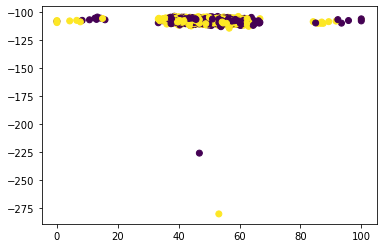

17
['Average_Line_ML'] vs ['Average_Line_Spread']


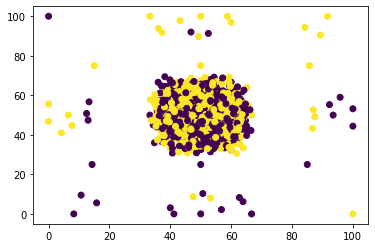

18
['Average_Line_ML'] vs ['Average_Odds_Spread']


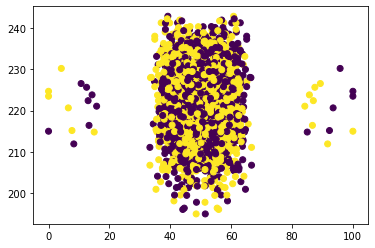

19
['Average_Line_ML'] vs ['PercentBet_OU']


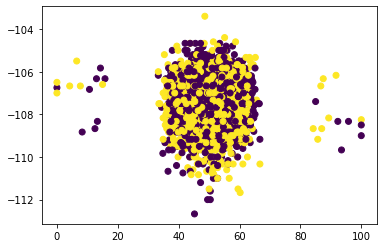

20
['Average_Line_ML'] vs ['Average_Line_OU']


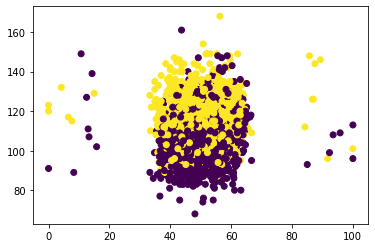

21
['Average_Line_ML'] vs ['Average_Odds_OU']


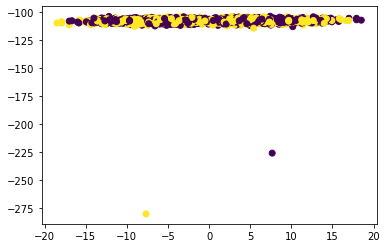

22
['PercentBet_Spread'] vs ['Average_Line_Spread']


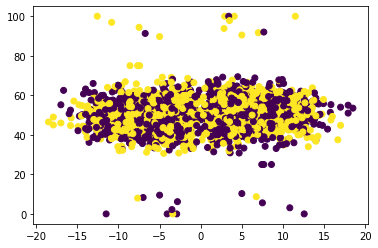

23
['PercentBet_Spread'] vs ['Average_Odds_Spread']


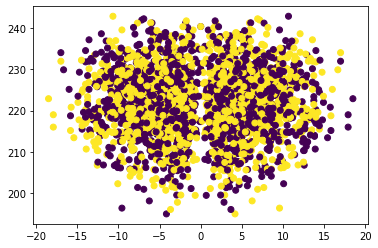

24
['PercentBet_Spread'] vs ['PercentBet_OU']


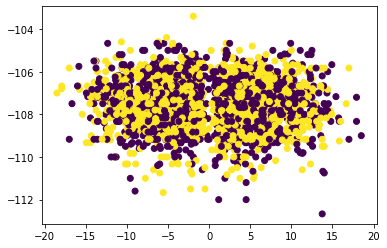

25
['PercentBet_Spread'] vs ['Average_Line_OU']


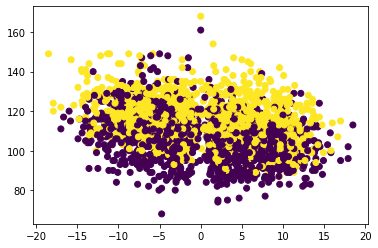

26
['PercentBet_Spread'] vs ['Average_Odds_OU']


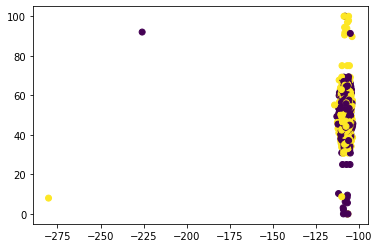

27
['Average_Line_Spread'] vs ['Average_Odds_Spread']


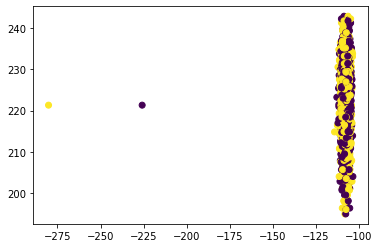

28
['Average_Line_Spread'] vs ['PercentBet_OU']


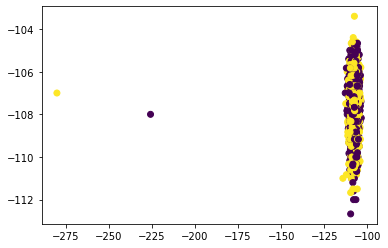

29
['Average_Line_Spread'] vs ['Average_Line_OU']


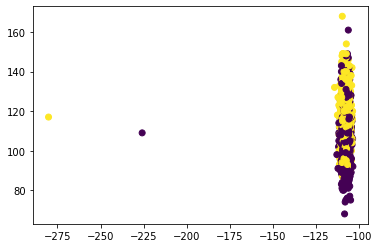

30
['Average_Line_Spread'] vs ['Average_Odds_OU']


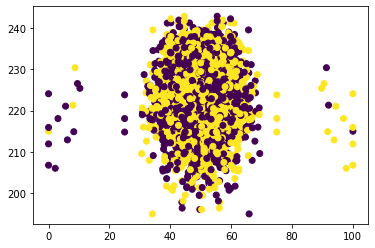

31
['Average_Odds_Spread'] vs ['PercentBet_OU']


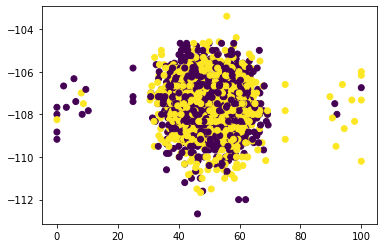

32
['Average_Odds_Spread'] vs ['Average_Line_OU']


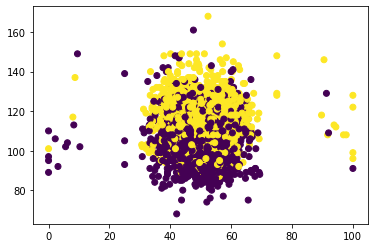

33
['Average_Odds_Spread'] vs ['Average_Odds_OU']


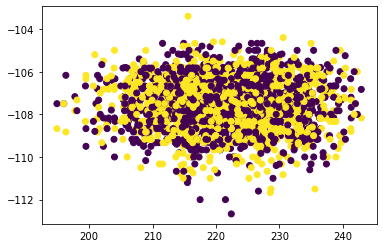

34
['PercentBet_OU'] vs ['Average_Line_OU']


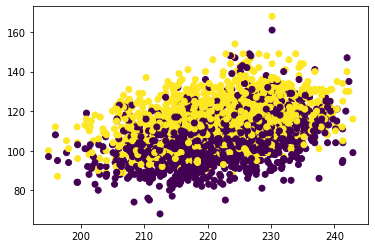

35
['PercentBet_OU'] vs ['Average_Odds_OU']


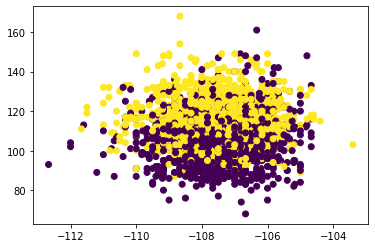

36
['Average_Line_OU'] vs ['Average_Odds_OU']


In [21]:
correlation_graphs(df_spread,'Spread WL')

In [22]:
# Now lets make final drops before applying ML model
# Maybe Include Percent Bet ML and Percent Bet Spread if needed***
df_spread = df_spread[['Location','Average_Line_ML','Average_Odds_Spread','PercentBet_OU','Average_Line_OU','Average_Odds_OU','Spread WL']]
df_spread

Location  Average_Line_ML  Average_Odds_Spread  PercentBet_OU  \
0        away            183.2              -105.80           56.9   
1        home           -210.4              -108.20           43.1   
2        away            713.6              -106.00           52.2   
3        home          -1015.4              -109.83           47.8   
4        away           -162.0              -109.40           56.7   
...       ...              ...                  ...            ...   
2447     home           -888.8              -107.67           43.8   
2448     away            262.8              -108.67           46.5   
2449     home           -311.2              -110.17           53.5   
2450     away            131.0              -107.50           55.7   
2451     home           -147.8              -107.50           44.3   

      Average_Line_OU  Average_Odds_OU  Spread WL  
0              210.92          -106.17          0  
1              210.92          -108.83          1  
2              220.83          -108.33          1  
3              220.83          -106.67          0  
4              221.08          -108.67          0  
...               ...              ...        ...  
2447           218.42          -107.17          0  
2448           225.50          -107.40          1  
2449           225.50          -106.60          0  
2450           227.00          -107.67          0  
2451           227.00          -107.33          1  

[2452 rows x 7 columns]

In [23]:
# Converting Categorical Variables to numeric for ML algorithm
location_spread = pd.get_dummies(df_spread.Location)
final_spread_df = location_spread.join(df_spread).drop(columns='Location',axis=1)
final_spread_df

away  home  Average_Line_ML  Average_Odds_Spread  PercentBet_OU  \
0        1     0            183.2              -105.80           56.9   
1        0     1           -210.4              -108.20           43.1   
2        1     0            713.6              -106.00           52.2   
3        0     1          -1015.4              -109.83           47.8   
4        1     0           -162.0              -109.40           56.7   
...    ...   ...              ...                  ...            ...   
2447     0     1           -888.8              -107.67           43.8   
2448     1     0            262.8              -108.67           46.5   
2449     0     1           -311.2              -110.17           53.5   
2450     1     0            131.0              -107.50           55.7   
2451     0     1           -147.8              -107.50           44.3   

      Average_Line_OU  Average_Odds_OU  Spread WL  
0              210.92          -106.17          0  
1              210.92          -108.83          1  
2              220.83          -108.33          1  
3              220.83          -106.67          0  
4              221.08          -108.67          0  
...               ...              ...        ...  
2447           218.42          -107.17          0  
2448           225.50          -107.40          1  
2449           225.50          -106.60          0  
2450           227.00          -107.67          0  
2451           227.00          -107.33          1  

[2452 rows x 8 columns]

In [24]:
# Splitting the Target Variable and the features
y_spread = final_spread_df['Spread WL']
X_spread = final_spread_df.drop(columns=['Spread WL'],axis=1).values

In [25]:
# Splitting the Data into Training and Testing sets
X_train_spread,X_test_spread,y_train_spread,y_test_spread = train_test_split(X_spread,y_spread,random_state=42)

In [26]:
# Scaling the data

# Creating instance of scaler
scaler_spread = skl.preprocessing.StandardScaler()

# Fit the scaler
scaler_spread.fit(X_train_spread)

# Scale the Data
X_train_scaled_spread = scaler_spread.transform(X_train_spread)
X_test_scaled_spread = scaler_spread.transform(X_test_spread)

In [27]:
# Create the Neural Network Model
nn_model_spread = tf.keras.models.Sequential()

# Add the Layers

# Adding First Hidden Layer with Input Dimensions(7)
nn_model_spread.add(tf.keras.layers.Dense(units=14,activation='relu',input_dim=7))

# Adding Second Hidden Layer
nn_model_spread.add(tf.keras.layers.Dense(units=14,activation='relu'))

# Adding Output Layer
nn_model_spread.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

# Check Layout of Neural Network
nn_model_spread.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 14)                112       
                                                                 
 dense_7 (Dense)             (None, 14)                210       
                                                                 
 dense_8 (Dense)             (None, 1)                 15        
                                                                 
Total params: 337
Trainable params: 337
Non-trainable params: 0
_________________________________________________________________


In [28]:
# Compile the Network
nn_model_spread.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Run the Network
fit_model_spread = nn_model_spread.fit(X_train_scaled_spread,y_train_spread,epochs=100)

Epoch 1/100
58/58 [==============================] - 0s 1ms/step - loss: 0.7094 - accuracy: 0.4850
Epoch 2/100
58/58 [==============================] - 0s 1ms/step - loss: 0.7022 - accuracy: 0.4916
Epoch 3/100
58/58 [==============================] - 0s 1ms/step - loss: 0.6984 - accuracy: 0.4970
Epoch 4/100
58/58 [==============================] - 0s 1ms/step - loss: 0.6963 - accuracy: 0.5063
Epoch 5/100
58/58 [==============================] - 0s 1ms/step - loss: 0.6942 - accuracy: 0.5079
Epoch 6/100
58/58 [==============================] - 0s 1ms/step - loss: 0.6928 - accuracy: 0.5144
Epoch 7/100
58/58 [==============================] - 0s 1ms/step - loss: 0.6910 - accuracy: 0.5171
Epoch 8/100
58/58 [==============================] - 0s 1ms/step - loss: 0.6905 - accuracy: 0.5302
Epoch 9/100
58/58 [==============================] - 0s 1ms/step - loss: 0.6893 - accuracy: 0.5188
Epoch 10/100
58/58 [==============================] - 0s 1ms/step - loss: 0.6877 - accuracy: 0.5400
Epoch 11/

58/58 [==============================] - 0s 1ms/step - loss: 0.6519 - accuracy: 0.5927
Epoch 84/100
58/58 [==============================] - 0s 2ms/step - loss: 0.6515 - accuracy: 0.6112
Epoch 85/100
58/58 [==============================] - 0s 1ms/step - loss: 0.6512 - accuracy: 0.6074
Epoch 86/100
58/58 [==============================] - 0s 1ms/step - loss: 0.6498 - accuracy: 0.5998
Epoch 87/100
58/58 [==============================] - 0s 1ms/step - loss: 0.6497 - accuracy: 0.6166
Epoch 88/100
58/58 [==============================] - 0s 1ms/step - loss: 0.6489 - accuracy: 0.6117
Epoch 89/100
58/58 [==============================] - 0s 1ms/step - loss: 0.6488 - accuracy: 0.6156
Epoch 90/100
58/58 [==============================] - 0s 1ms/step - loss: 0.6487 - accuracy: 0.6156
Epoch 91/100
58/58 [==============================] - 0s 1ms/step - loss: 0.6485 - accuracy: 0.6063
Epoch 92/100
58/58 [==============================] - 0s 1ms/step - loss: 0.6484 - accuracy: 0.6139
Epoch 93/100


# Over/Under

In [34]:
df_OU = df.copy()
df_OU = df_OU.drop(columns=['MoneyLine WL','Spread WL'])
df_OU

Location  PercentBet_ML  Average_Line_ML  PercentBet_Spread  \
0        away           46.0            183.2               45.1   
1        home           54.0           -210.4               54.9   
2        away           55.7            713.6               42.4   
3        home           44.3          -1015.4               57.6   
4        away           58.9           -162.0               58.6   
...       ...            ...              ...                ...   
2447     home           45.2           -888.8               59.6   
2448     away           61.6            262.8               39.7   
2449     home           38.4           -311.2               60.3   
2450     away           58.1            131.0               58.3   
2451     home           41.9           -147.8               41.7   

      Average_Line_Spread  Average_Odds_Spread  PercentBet_OU  \
0                    4.70              -105.80           56.9   
1                   -4.70              -108.20           43.1   
2                   12.50              -106.00           52.2   
3                  -12.50              -109.83           47.8   
4                   -3.50              -109.40           56.7   
...                   ...                  ...            ...   
2447               -12.67              -107.67           43.8   
2448                 7.33              -108.67           46.5   
2449                -7.33              -110.17           53.5   
2450                 3.67              -107.50           55.7   
2451                -3.67              -107.50           44.3   

      Average_Line_OU  Average_Odds_OU  Pts  Spread Result  Total  \
0              210.92          -106.17   87     -18      L    192   
1              210.92          -108.83  105      18      W    192   
2              220.83          -108.33  100      -8      L    208   
3              220.83          -106.67  108       8      W    208   
4              221.08          -108.67  113       1      W    225   
...               ...              ...  ...     ...    ...    ...   
2447           218.42          -107.17   99       4      W    194   
2448           225.50          -107.40  137      -6      L    280   
2449           225.50          -106.60  143       6      W    280   
2450           227.00          -107.67  131      -5      L    267   
2451           227.00          -107.33  136       5      W    267   

      Over/Under WL  
0                 0  
1                 0  
2                 0  
3                 0  
4                 1  
...             ...  
2447              0  
2448              1  
2449              1  
2450              1  
2451              1  

[2452 rows x 14 columns]

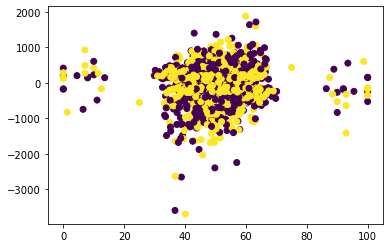

1
['Location'] vs ['PercentBet_ML']


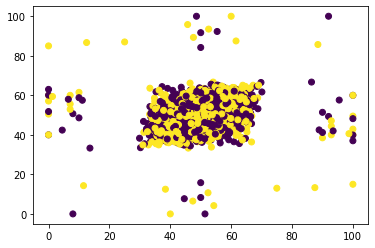

2
['Location'] vs ['Average_Line_ML']


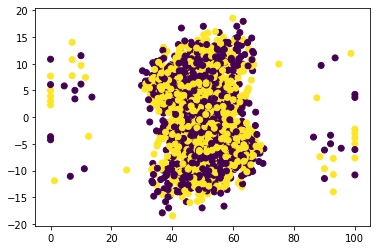

3
['Location'] vs ['PercentBet_Spread']


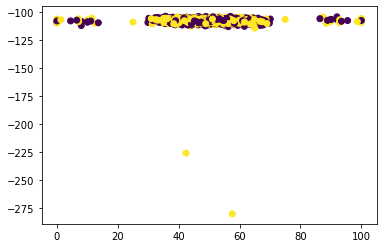

4
['Location'] vs ['Average_Line_Spread']


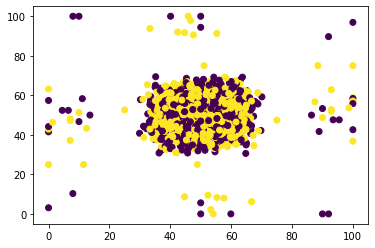

5
['Location'] vs ['Average_Odds_Spread']


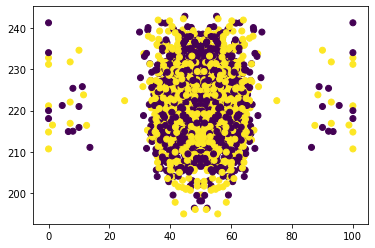

6
['Location'] vs ['PercentBet_OU']


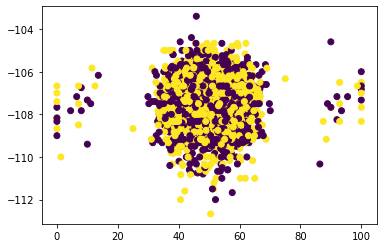

7
['Location'] vs ['Average_Line_OU']


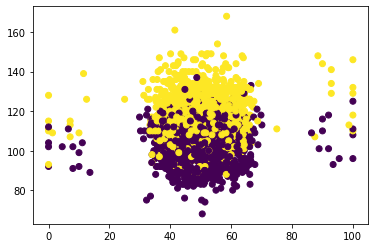

8
['Location'] vs ['Average_Odds_OU']


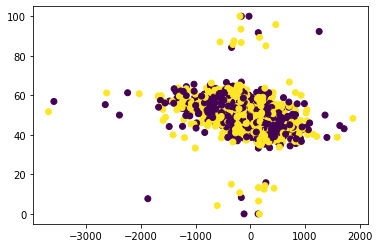

9
['PercentBet_ML'] vs ['Average_Line_ML']


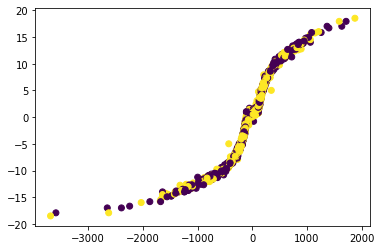

10
['PercentBet_ML'] vs ['PercentBet_Spread']


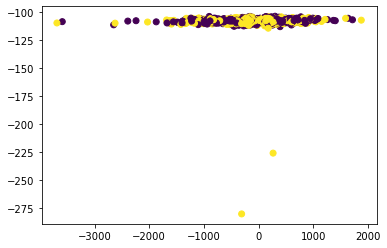

11
['PercentBet_ML'] vs ['Average_Line_Spread']


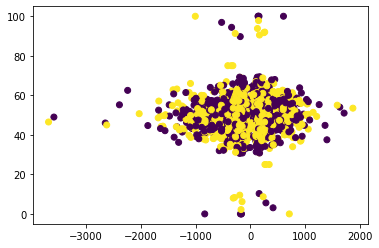

12
['PercentBet_ML'] vs ['Average_Odds_Spread']


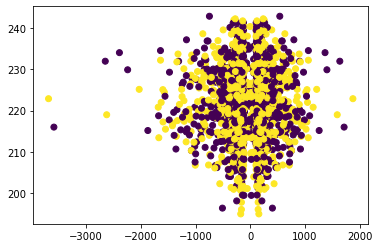

13
['PercentBet_ML'] vs ['PercentBet_OU']


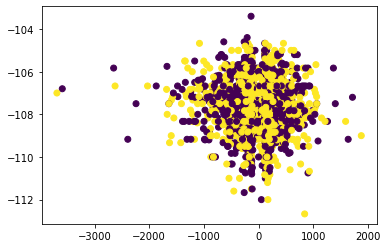

14
['PercentBet_ML'] vs ['Average_Line_OU']


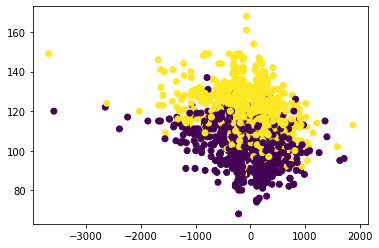

15
['PercentBet_ML'] vs ['Average_Odds_OU']


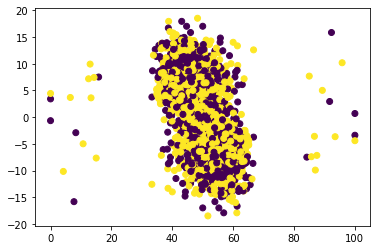

16
['Average_Line_ML'] vs ['PercentBet_Spread']


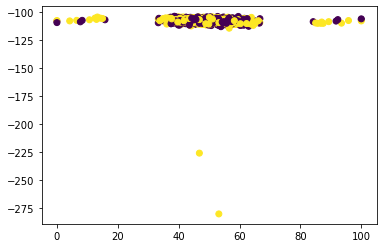

17
['Average_Line_ML'] vs ['Average_Line_Spread']


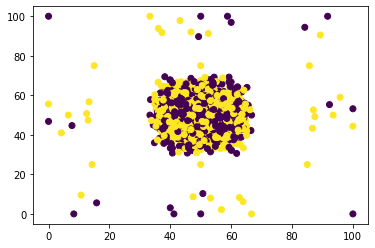

18
['Average_Line_ML'] vs ['Average_Odds_Spread']


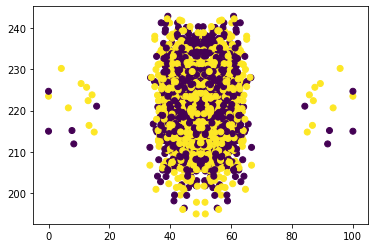

19
['Average_Line_ML'] vs ['PercentBet_OU']


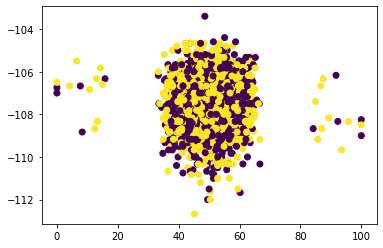

20
['Average_Line_ML'] vs ['Average_Line_OU']


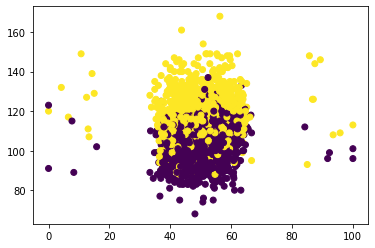

21
['Average_Line_ML'] vs ['Average_Odds_OU']


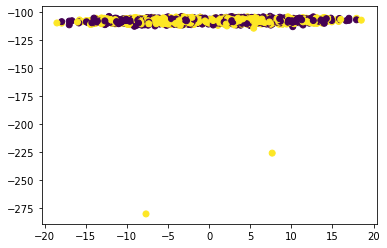

22
['PercentBet_Spread'] vs ['Average_Line_Spread']


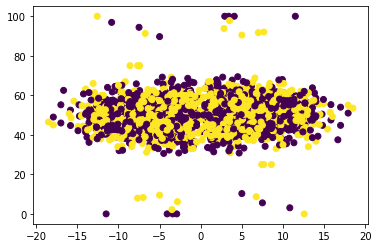

23
['PercentBet_Spread'] vs ['Average_Odds_Spread']


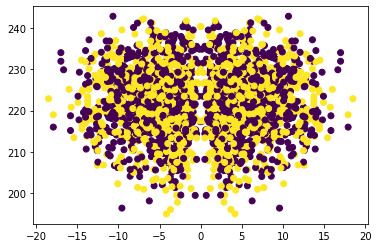

24
['PercentBet_Spread'] vs ['PercentBet_OU']


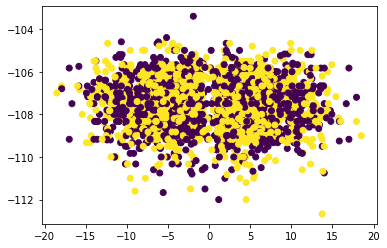

25
['PercentBet_Spread'] vs ['Average_Line_OU']


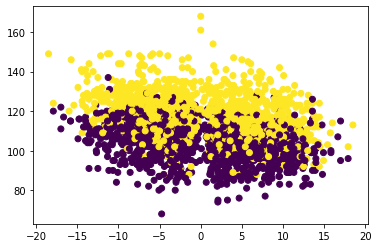

26
['PercentBet_Spread'] vs ['Average_Odds_OU']


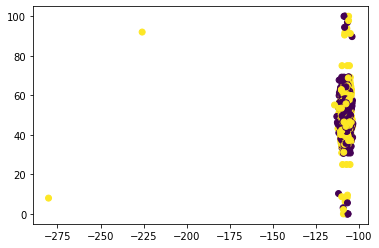

27
['Average_Line_Spread'] vs ['Average_Odds_Spread']


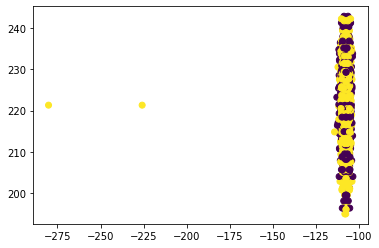

28
['Average_Line_Spread'] vs ['PercentBet_OU']


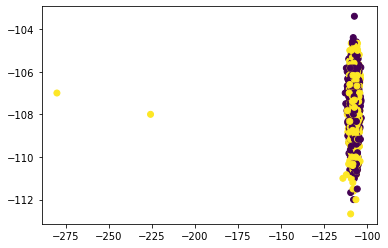

29
['Average_Line_Spread'] vs ['Average_Line_OU']


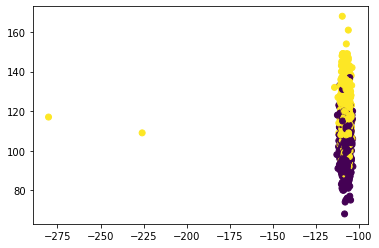

30
['Average_Line_Spread'] vs ['Average_Odds_OU']


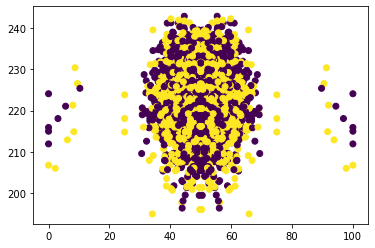

31
['Average_Odds_Spread'] vs ['PercentBet_OU']


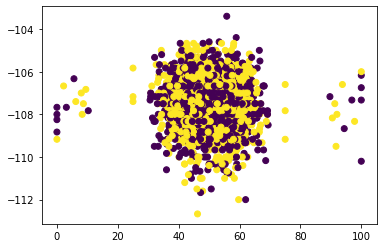

32
['Average_Odds_Spread'] vs ['Average_Line_OU']


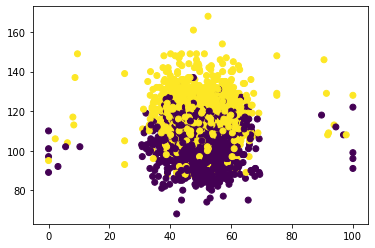

33
['Average_Odds_Spread'] vs ['Average_Odds_OU']


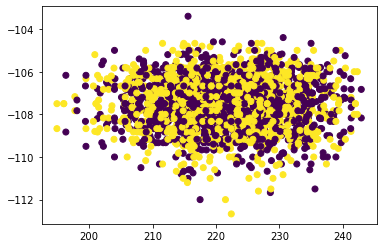

34
['PercentBet_OU'] vs ['Average_Line_OU']


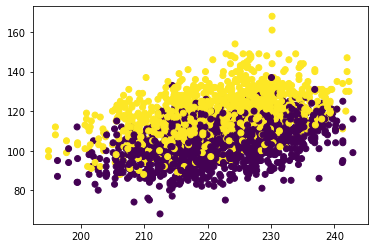

35
['PercentBet_OU'] vs ['Average_Odds_OU']


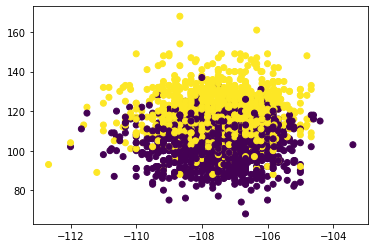

36
['Average_Line_OU'] vs ['Average_Odds_OU']


In [35]:
correlation_graphs(df_OU,'Over/Under WL')

In [36]:
df_OU = df_OU[['Location','Average_Odds_OU','PercentBet_ML','Average_Line_ML','PercentBet_Spread','Average_Line_Spread','Average_Odds_Spread','PercentBet_OU','Average_Line_OU','Over/Under WL']]
df_OU

Location  Average_Odds_OU  PercentBet_ML  Average_Line_ML  \
0        away          -106.17           46.0            183.2   
1        home          -108.83           54.0           -210.4   
2        away          -108.33           55.7            713.6   
3        home          -106.67           44.3          -1015.4   
4        away          -108.67           58.9           -162.0   
...       ...              ...            ...              ...   
2447     home          -107.17           45.2           -888.8   
2448     away          -107.40           61.6            262.8   
2449     home          -106.60           38.4           -311.2   
2450     away          -107.67           58.1            131.0   
2451     home          -107.33           41.9           -147.8   

      PercentBet_Spread  Average_Line_Spread  Average_Odds_Spread  \
0                  45.1                 4.70              -105.80   
1                  54.9                -4.70              -108.20   
2                  42.4                12.50              -106.00   
3                  57.6               -12.50              -109.83   
4                  58.6                -3.50              -109.40   
...                 ...                  ...                  ...   
2447               59.6               -12.67              -107.67   
2448               39.7                 7.33              -108.67   
2449               60.3                -7.33              -110.17   
2450               58.3                 3.67              -107.50   
2451               41.7                -3.67              -107.50   

      PercentBet_OU  Average_Line_OU  Over/Under WL  
0              56.9           210.92              0  
1              43.1           210.92              0  
2              52.2           220.83              0  
3              47.8           220.83              0  
4              56.7           221.08              1  
...             ...              ...            ...  
2447           43.8           218.42              0  
2448           46.5           225.50              1  
2449           53.5           225.50              1  
2450           55.7           227.00              1  
2451           44.3           227.00              1  

[2452 rows x 10 columns]

In [37]:
# Converting Categorical Variables to numeric for ML algorithm
location_OU = pd.get_dummies(df_OU.Location)
final_OU_df = location_OU.join(df_OU).drop(columns='Location',axis=1)
final_OU_df

away  home  Average_Odds_OU  PercentBet_ML  Average_Line_ML  \
0        1     0          -106.17           46.0            183.2   
1        0     1          -108.83           54.0           -210.4   
2        1     0          -108.33           55.7            713.6   
3        0     1          -106.67           44.3          -1015.4   
4        1     0          -108.67           58.9           -162.0   
...    ...   ...              ...            ...              ...   
2447     0     1          -107.17           45.2           -888.8   
2448     1     0          -107.40           61.6            262.8   
2449     0     1          -106.60           38.4           -311.2   
2450     1     0          -107.67           58.1            131.0   
2451     0     1          -107.33           41.9           -147.8   

      PercentBet_Spread  Average_Line_Spread  Average_Odds_Spread  \
0                  45.1                 4.70              -105.80   
1                  54.9                -4.70              -108.20   
2                  42.4                12.50              -106.00   
3                  57.6               -12.50              -109.83   
4                  58.6                -3.50              -109.40   
...                 ...                  ...                  ...   
2447               59.6               -12.67              -107.67   
2448               39.7                 7.33              -108.67   
2449               60.3                -7.33              -110.17   
2450               58.3                 3.67              -107.50   
2451               41.7                -3.67              -107.50   

      PercentBet_OU  Average_Line_OU  Over/Under WL  
0              56.9           210.92              0  
1              43.1           210.92              0  
2              52.2           220.83              0  
3              47.8           220.83              0  
4              56.7           221.08              1  
...             ...              ...            ...  
2447           43.8           218.42              0  
2448           46.5           225.50              1  
2449           53.5           225.50              1  
2450           55.7           227.00              1  
2451           44.3           227.00              1  

[2452 rows x 11 columns]

In [38]:
# Splitting the Target Variable and the Features 
y_OU = final_OU_df['Over/Under WL']
X_OU = final_OU_df.drop(columns=['Over/Under WL'],axis=1).values

In [40]:
# Splitting the Data into Training and Testing sets
X_train_OU,X_test_OU,y_train_OU,y_test_OU = train_test_split(X_OU,y_OU,random_state=42)

In [41]:
# Scaling the Data

# Creating instance of scaler
scaler_OU = skl.preprocessing.StandardScaler()

# Fit the scaler
scaler_OU.fit(X_train_OU)

# Scale the Data
X_train_scaled_OU = scaler_OU.transform(X_train_OU)
X_test_scaled_OU = scaler_OU.transform(X_test_OU)

In [42]:
# Create the Neural Network Model 
nn_model_OU = tf.keras.models.Sequential()

# Add the Layers

# Adding the First Hidden Layer and Input Dimensions(10)
nn_model_OU.add(tf.keras.layers.Dense(units=20,activation='relu',input_dim=10))

# Adding the Second Hidden Layer
nn_model_OU.add(tf.keras.layers.Dense(units=20,activation='relu'))

# Adding the Output Layer
nn_model_OU.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

# Check Layout of Neural Network
nn_model_OU.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 20)                220       
                                                                 
 dense_10 (Dense)            (None, 20)                420       
                                                                 
 dense_11 (Dense)            (None, 1)                 21        
                                                                 
Total params: 661
Trainable params: 661
Non-trainable params: 0
_________________________________________________________________


In [43]:
# Compile the Network
nn_model_OU.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Run the Network
fit_model_OU = nn_model_OU.fit(X_train_scaled_OU,y_train_OU,epochs=100)

Epoch 1/100
58/58 [==============================] - 0s 1ms/step - loss: 0.7173 - accuracy: 0.4807
Epoch 2/100
58/58 [==============================] - 0s 1ms/step - loss: 0.6971 - accuracy: 0.4807
Epoch 3/100
58/58 [==============================] - 0s 1ms/step - loss: 0.6931 - accuracy: 0.5117
Epoch 4/100
58/58 [==============================] - 0s 1ms/step - loss: 0.6902 - accuracy: 0.5291
Epoch 5/100
58/58 [==============================] - 0s 1ms/step - loss: 0.6883 - accuracy: 0.5372
Epoch 6/100
58/58 [==============================] - 0s 1ms/step - loss: 0.6862 - accuracy: 0.5405
Epoch 7/100
58/58 [==============================] - 0s 1ms/step - loss: 0.6850 - accuracy: 0.5470
Epoch 8/100
58/58 [==============================] - 0s 1ms/step - loss: 0.6837 - accuracy: 0.5514
Epoch 9/100
58/58 [==============================] - 0s 1ms/step - loss: 0.6826 - accuracy: 0.5579
Epoch 10/100
58/58 [==============================] - 0s 1ms/step - loss: 0.6821 - accuracy: 0.5585
Epoch 11/

58/58 [==============================] - 0s 2ms/step - loss: 0.6360 - accuracy: 0.6259
Epoch 84/100
58/58 [==============================] - 0s 2ms/step - loss: 0.6347 - accuracy: 0.6286
Epoch 85/100
58/58 [==============================] - 0s 2ms/step - loss: 0.6340 - accuracy: 0.6270
Epoch 86/100
58/58 [==============================] - 0s 2ms/step - loss: 0.6347 - accuracy: 0.6259
Epoch 87/100
58/58 [==============================] - 0s 2ms/step - loss: 0.6342 - accuracy: 0.6237
Epoch 88/100
58/58 [==============================] - 0s 2ms/step - loss: 0.6330 - accuracy: 0.6264
Epoch 89/100
58/58 [==============================] - 0s 2ms/step - loss: 0.6325 - accuracy: 0.6248
Epoch 90/100
58/58 [==============================] - 0s 2ms/step - loss: 0.6324 - accuracy: 0.6237
Epoch 91/100
58/58 [==============================] - 0s 1ms/step - loss: 0.6319 - accuracy: 0.6351
Epoch 92/100
58/58 [==============================] - 0s 2ms/step - loss: 0.6327 - accuracy: 0.6253
Epoch 93/100


# Running the Models with User Inputs

In [ ]:
def run_models(input_dict):
    for key,value in enumerate(input_dict):
        print(f'Key={key}:Value={value}')
    return 'The 3 outputs'